In [41]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# leitura do arquivo de treino
url = 'https://raw.githubusercontent.com/Enrico-13/Atividade-02/main/Dados/train.csv'
df = pd.read_csv(url)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [43]:
# verificação das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
# criação das listas das colunas quantitativas e qualitativas
qualitative = [column for column in df.columns if df.dtypes[column] == object]
quantitative = [column for column in df.columns if df.dtypes[column] != object]
quantitative.remove('SalePrice')
quantitative.remove('Id')

In [45]:
# criação dos dataframes com essas informações
qualitative_columns = pd.DataFrame(qualitative)
qualitative_columns.columns = ['qualitativas']

quantitative_columns = pd.DataFrame(quantitative)
quantitative_columns.columns = ['quantitativas']

In [46]:
# criação do arquivo excel para estudo próprio
# excel_path = '../Dados/exploracao.xlsx'
# with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
#     workbook = writer.book

#     qualitative_columns.to_excel(writer, sheet_name='qualitativas', index=False, startcol=1, startrow=1)
#     quantitative_columns.to_excel(writer, sheet_name='quantitativas',index=False, startcol=1, startrow=1)


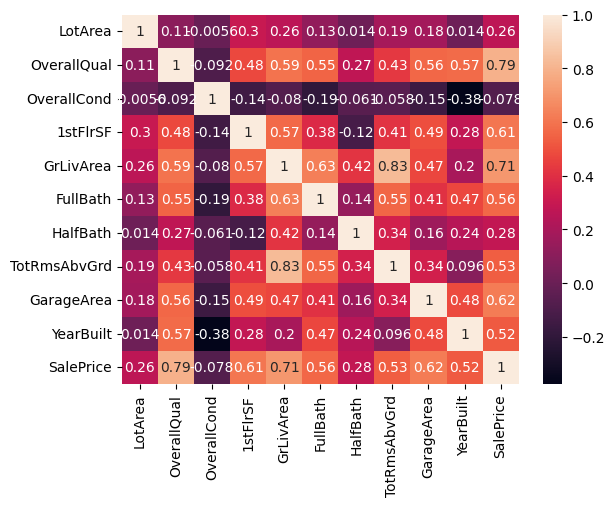

In [47]:
# teste de correlação utilizando as variáveis quantitativas que aparentam ter maior impacto 
correl_testing = [
    'LotArea',
    'OverallQual',
    'OverallCond',
    '1stFlrSF',
    'GrLivArea',
    'FullBath',
    'HalfBath',
    'TotRmsAbvGrd',
    'GarageArea',
    'YearBuilt',
    'SalePrice'
]

corrmat = df[correl_testing].corr()
sns.heatmap(corrmat, annot=True)

# OverallCond tem pouca correlação, então será retirada
correl_testing.remove('OverallCond')

In [48]:
# imports para geração do modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# separação de X e y, e de treino e teste
train_data = df[correl_testing].copy()
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [49]:
# predição do modelo de teste, e resultados
y_pred = reg.predict(X_test)

print('R²', reg.score(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R² 0.8244779012597742
RMSE: 32642.052173195178


In [50]:
# leitura do arquivo de teste
url = 'https://raw.githubusercontent.com/Enrico-13/Atividade-02/main/Dados/test.csv'
test_df = pd.read_csv(url)

In [51]:
# remoção da coluna de preços para predição final do modelo
correl_testing.remove('SalePrice')
test_df = test_df[correl_testing]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1459 non-null   int64  
 1   OverallQual   1459 non-null   int64  
 2   1stFlrSF      1459 non-null   int64  
 3   GrLivArea     1459 non-null   int64  
 4   FullBath      1459 non-null   int64  
 5   HalfBath      1459 non-null   int64  
 6   TotRmsAbvGrd  1459 non-null   int64  
 7   GarageArea    1458 non-null   float64
 8   YearBuilt     1459 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.7 KB


In [52]:
# existe um valor vazio, completando com a média do valor da coluna para adequar ao modelo de entrega
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())

In [53]:
# uso do modelo para obtenção dos resultados
y_pred = reg.predict(test_df)
y_pred

array([127067.22396899, 167540.54552562, 168997.33818837, ...,
       148264.45264626, 114271.74896849, 234856.71106985])

In [54]:
# inclusão dos resultados na base de dados de teste
test_df['SalePrice'] = y_pred

In [55]:
test_df

,LotArea,OverallQual,1stFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,GarageArea,YearBuilt,SalePrice
0,11622,5,896,896,1,0,5,730.0,1961,127067.223969
1,14267,6,1329,1329,1,1,6,312.0,1958,167540.545526
2,13830,5,928,1629,2,1,6,482.0,1997,168997.338188
3,9978,6,926,1604,2,1,7,470.0,1998,187680.974020
4,5005,8,1280,1280,2,0,5,506.0,1992,220635.116113
...,...,...,...,...,...,...,...,...,...,...
1454,1936,4,546,1092,1,1,5,0.0,1970,76804.775716
1455,1894,4,546,1092,1,1,6,286.0,1970,87551.901596
1456,20000,5,1224,1224,1,0,7,576.0,1960,148264.452646
1457,10441,5,970,970,1,0,6,0.0,1992,114271.748968


In [56]:
# criação da coluna Id para se adequar ao padrão da entrega
test_df['Id'] = test_df.index + 1461
test_df

,LotArea,OverallQual,1stFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,GarageArea,YearBuilt,SalePrice,Id
0,11622,5,896,896,1,0,5,730.0,1961,127067.223969,1461
1,14267,6,1329,1329,1,1,6,312.0,1958,167540.545526,1462
2,13830,5,928,1629,2,1,6,482.0,1997,168997.338188,1463
3,9978,6,926,1604,2,1,7,470.0,1998,187680.974020,1464
4,5005,8,1280,1280,2,0,5,506.0,1992,220635.116113,1465
...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,4,546,1092,1,1,5,0.0,1970,76804.775716,2915
1455,1894,4,546,1092,1,1,6,286.0,1970,87551.901596,2916
1456,20000,5,1224,1224,1,0,7,576.0,1960,148264.452646,2917
1457,10441,5,970,970,1,0,6,0.0,1992,114271.748968,2918


In [57]:
# criação do dataframe de entrega
output = test_df[['Id', 'SalePrice']]
output

,Id,SalePrice
0,1461,127067.223969
1,1462,167540.545526
2,1463,168997.338188
3,1464,187680.974020
4,1465,220635.116113
...,...,...
1454,2915,76804.775716
1455,2916,87551.901596
1456,2917,148264.452646
1457,2918,114271.748968


In [58]:
# criação do arquivo csv para entrega
file_path = '../Dados/test_results.csv'
output.to_csv(file_path, sep=',', index=False)